# **<u> Aprendizaje Automático  </u>**

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/Student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


## **<u> Regresión (Predecir un número cuantitativo - entero / continuo) </u>**

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor


In [94]:
def compare_models(model_dict):
    results = []

    for name, (mse, r2, mae, rmse, pred) in model_dict.items():
        stats = [name, mse, r2, mae, rmse, pred]
        results.append(stats)
    # df_results = pd.DataFrame(results, columns=['Modelo', 'Error Cuadrático Medio (MSE)', 'Coeficiente de Determinación (R^2)', 'Predicciones'])
    df_results = pd.DataFrame(results, columns=['Modelo', 'MSE', 'R2', 'MAE', 'RMSE', 'Predicciones'])
    return df_results

def gen_graph(x, y_pred, x_name, y_name, title):
    plt.figure(figsize=(14,7))

    sns.scatterplot(data=df, x=x_name, y=y_name)
    plt.plot(x, y_pred, color='red', label='Recta de regresión')
    plt.title(title)
    plt.savefig('./graph/' + title + '.png')


### Regresion Lineal

In [95]:

# Función de regresión lineal
def regresion_lineal(x, y, x_n, y_n):
    # Crear un modelo de regresión lineal
    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(x, y)

    # Hacer predicciones para todos los valores de X
    y_pred = model.predict(x)

    # Calcular métricas
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)  # squared=False returns the RMSE

    # Generar gráfico
    gen_graph(x, y_pred, x_n, y_n, 'Modelo de regresión lineal para predecir los resultados')
    return mse, r2, mae, rmse, y_pred

### Regresión Polinómica

In [96]:
def regresion_polinomica(x, y, x_n, y_n):
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=10)  # Cambiar degree para ajustar la complejidad del modelo
    x_poly = poly.fit_transform(x)

    # Crear el modelo de regresión polinómica
    poly_model = LinearRegression()

    # Ajustar el modelo a los datos
    poly_model.fit(x_poly, y)

    # Hacer predicciones
    y_poly_pred = poly_model.predict(x_poly)

    # Evaluar el modelo
    mse_poly = mean_squared_error(y, y_poly_pred)
    r2_poly = r2_score(y, y_poly_pred)
    mae_poly = mean_absolute_error(y, y_poly_pred)
    rmse_poly = mean_squared_error(y, y_poly_pred, squared=False)  # squared=False returns the RMSE

    gen_graph(x, y_poly_pred, x_n, y_n, 'Modelo de regresión polinómica para predecir los resultados')
    return mse_poly, r2_poly, mae_poly, rmse_poly, y_poly_pred

### Red Neuronal

In [97]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

def regresion_neuronal(x, y, x_n, y_n):
    # Normalizar los datos de entrada
    x_mean = np.mean(x)
    x_std = np.std(x)
    y_mean = np.mean(y)
    y_std = np.std(y)

    x_norm = (x - x_mean) / x_std
    y_norm = (y - y_mean) / y_std

    # Dividir los datos en conjunto de entrenamiento y prueba
    x_train, x_test, y_train, y_test = train_test_split(x_norm, y_norm, test_size=0.2, random_state=42)

    # Crear el modelo de la red neuronal
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_dim=x_train.shape[1], activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Entrenar el modelo
    history = model.fit(x_train, y_train, epochs=100, validation_split=0.2, verbose=0)

    # Hacer predicciones
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    y_pred = model.predict(x_norm)

    # Desnormalizar las predicciones
    y_train_pred = y_train_pred * y_std + y_mean
    y_test_pred = y_test_pred * y_std + y_mean
    y_pred = y_pred * y_std + y_mean

    # Evaluar el modelo
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)

    # Generar gráfico
    gen_graph(x, y_pred, x_n, y_n, 'Modelo de red neuronal para predecir los resultados')

    return mse, r2, mae, rmse, y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


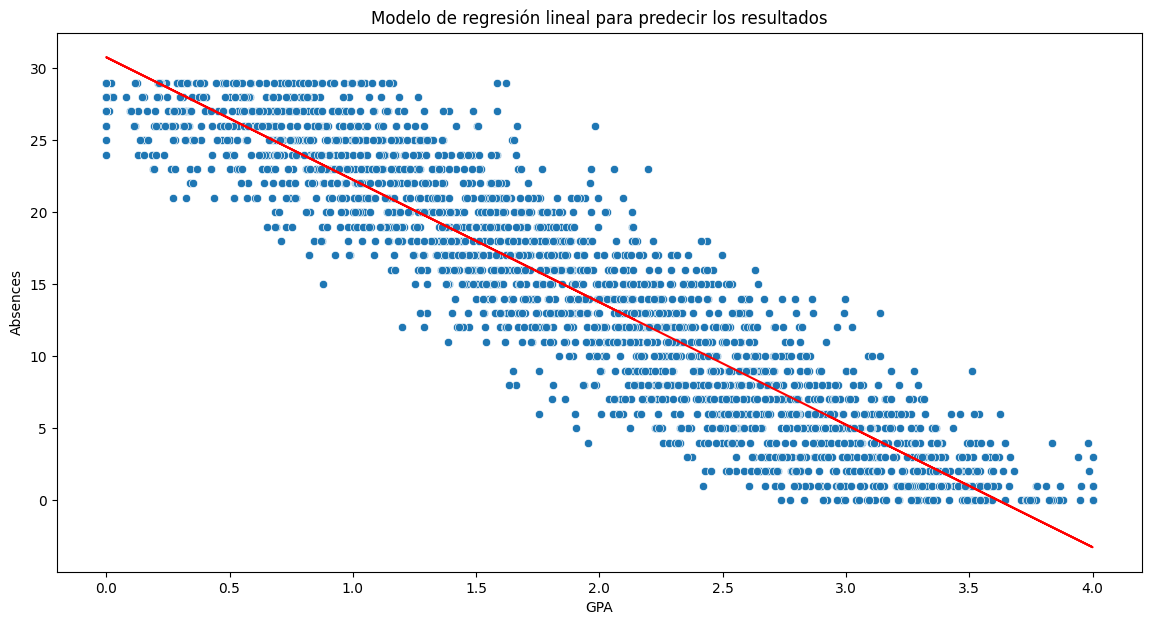

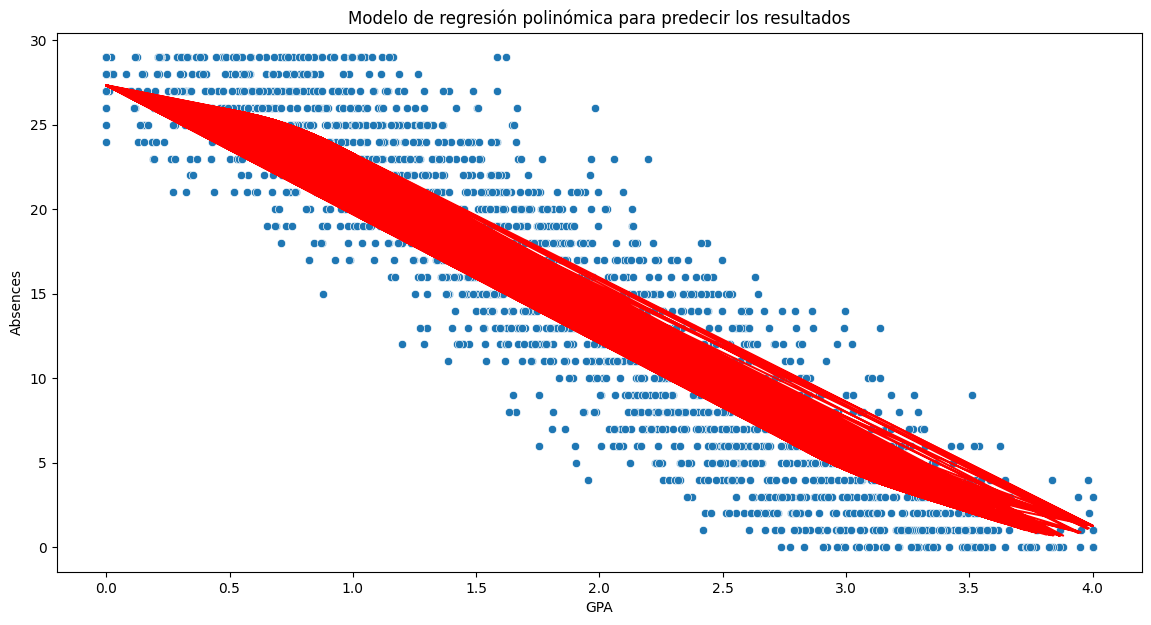

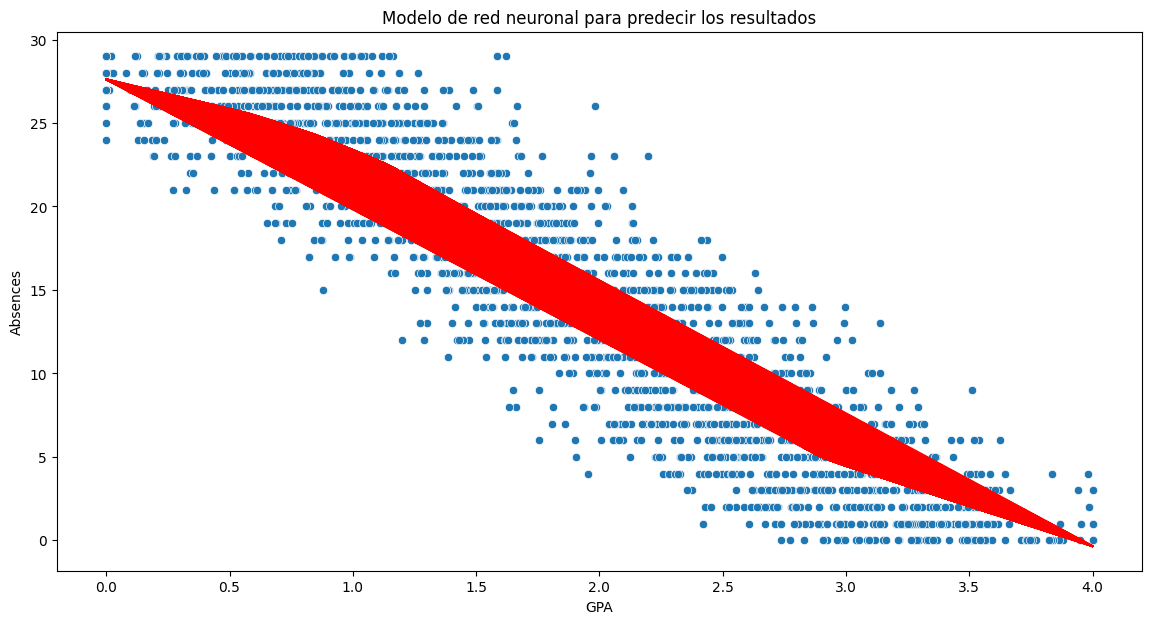

In [98]:
x_n = 'GPA'
y_n = 'Absences'

x = pd.Series(df[x_n])
y = pd.Series(df[y_n])


# Asegurar que x tenga dos dimensiones (n_samples, n_features)
x = x.values.reshape(-1, 1)

# Asegurar que y tenga dos dimensiones (n_samples, 1)
y = y.values.reshape(-1, 1)

models = {'Regresión Lineal': regresion_lineal(x, y, x_n, y_n),
              'Regresión Polinomica': regresion_polinomica(x, y, x_n, y_n),
              'Regresión Neuronal': regresion_neuronal(x, y, x_n, y_n),
}

comparison = compare_models(models)

In [99]:
comparison

,Modelo,MSE,R2,MAE,RMSE,Predicciones
0,Regresión Lineal,11.098563,0.845137,2.670945,3.331451,"[[5.839786817022009], [4.8725038266963985], [2..."
1,Regresión Polinomica,10.214574,0.857472,2.538985,3.196025,"[[5.024355534271436], [4.29797107359386], [26...."
2,Regresión Neuronal,10.222794,0.857357,2.540364,3.197311,"[[4.833166], [4.25671], [27.214748], [12.77241..."


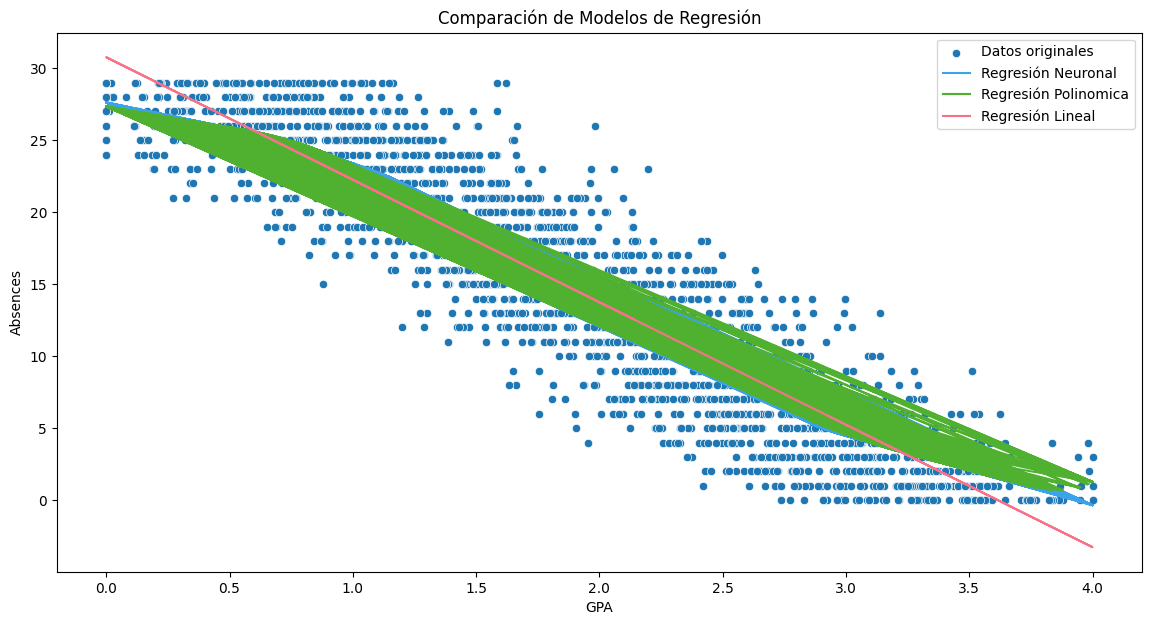

In [100]:
import random

# Cargar una paleta de colores de seaborn
palette = sns.color_palette("husl", n_colors=len(comparison))

def get_color(index):
    return palette[index]

comparison = comparison.iloc[::-1]

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x=x_n,  y=y_n, label='Datos originales')

# Agregar las predicciones de cada modelo
for index, row in comparison.iterrows():
    Modelo = row['Modelo']
    mse = row['MSE']
    r2 = row['R2']
    mae = row['MAE']
    rmse = row['RMSE']
    
    y_pred = row['Predicciones']
    # plt.plot(x, y_pred, color=random_color(), label=f'{Modelo} (MSE: {mse:.2f}, R2: {r2:.2f})')
    plt.plot(x, y_pred, color=get_color(index), label=f'{Modelo}')


plt.title('Comparación de Modelos de Regresión')
plt.xlabel('GPA')
plt.ylabel('Absences')
plt.legend()
plt.savefig('./graph/Comparacion_de_Modelos_de_Regression.png')
plt.show()

## **<u> Clasificación (Predecir una clase - binaria / multinomial) </u>**

### Regresión con Árbol de Decisión

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [102]:
def compare_models_class(model_dict):
    results = []
    confusion_matrices = {}

    for name, (confusion, exactitud, precision, sensibilidad, f1) in model_dict.items():
        stats = [name, exactitud, precision, sensibilidad, f1]
        results.append(stats)
        confusion_matrices[name] = confusion    

    df_results = pd.DataFrame(results, columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    return df_results, confusion_matrices

def gen_graph_class(df_metricas):

    fig, ax = plt.subplots(2, 2, figsize=(14, 10))

    sns.barplot(x='Modelo', y='Accuracy', data=df_metricas, ax=ax[0, 0])
    ax[0, 0].set_title('Exactitud')

    sns.barplot(x='Modelo', y='Precision', data=df_metricas, ax=ax[0, 1])
    ax[0, 1].set_title('Precision')

    sns.barplot(x='Modelo', y='Recall', data=df_metricas, ax=ax[1, 0])
    ax[1, 0].set_title('Recall')

    sns.barplot(x='Modelo', y='F1 Score', data=df_metricas, ax=ax[1, 1])
    ax[1, 1].set_title('F1 Score')

    plt.tight_layout()
    plt.savefig('./graph/Modelos de Clasificacion.png')
    plt.show()

def gen_confusion_matrix(confusion_matrices):
    for model_name, confusion in confusion_matrices.items():
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Matriz de Confusión - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.savefig(f'./graph/Matriz de Confusión - {model_name}.png')
        plt.show()

In [103]:
def random_forest(X_train, X_test, y_train, y_test):
    modelo = RandomForestClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [104]:
def maquina_vectores_soporte(X_train, X_test, y_train, y_test):
    modelo = SVC()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [105]:
def arbol_decision(X_train, X_test, y_train, y_test):
    modelo = DecisionTreeClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [106]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def red_neuronal_clasificacion(X_train, X_test, y_train, y_test):
    # Determinar el número de clases a partir de los datos
    num_classes = len(np.unique(y_train))
    input_dim = X_train.shape[1]
    
    # Convertir etiquetas a formato categórico (one-hot encoding)
    y_train_cat = to_categorical(y_train, num_classes=num_classes)
    y_test_cat = to_categorical(y_test, num_classes=num_classes)
    
    # Crear el modelo
    modelo = Sequential()
    modelo.add(Dense(64, input_dim=input_dim, activation='relu'))  # Capa oculta con 64 neuronas
    modelo.add(Dense(64, activation='relu'))  # Otra capa oculta con 64 neuronas
    modelo.add(Dense(num_classes, activation='softmax'))  # Capa de salida

    # Compilar el modelo
    modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Entrenar el modelo
    modelo.fit(X_train, y_train_cat, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

    # Hacer predicciones
    y_pred_cat = modelo.predict(X_test)
    y_pred = y_pred_cat.argmax(axis=1)  # Convertir one-hot encoding a etiquetas

    # Calcular métricas
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    return confusion, exactitud, precision, sensibilidad, f1


In [107]:
def regresión_logistica(X_train, X_test, y_train, y_test):
    modelo = LogisticRegression()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [108]:
def k_nearest(X_train, X_test, y_train, y_test):
    modelo = KNeighborsClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [109]:
def naive_bayes(X_train, X_test, y_train, y_test):
    modelo = GaussianNB()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4742 - loss: 1.5283 - val_accuracy: 0.4700 - val_loss: 1.3167
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.5629 - loss: 1.1435 - val_accuracy: 0.6240 - val_loss: 0.9753
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.6659 - loss: 0.8989 - val_accuracy: 0.7232 - val_loss: 0.9046
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - accuracy: 0.7754 - loss: 0.8138 - val_accuracy: 0.7102 - val_loss: 0.8798
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - accuracy: 0.7864 - loss: 0.7599 - val_accuracy: 0.8616 - val_loss: 0.8501
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8421 - loss: 0.7536 - val_accuracy: 0.8094 - val_loss: 0.8329
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.8478 - loss: 0.6914 - val_accuracy: 0.8564 - val_loss: 0.8128
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.8356 - loss: 0.7284 - val_accuracy:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


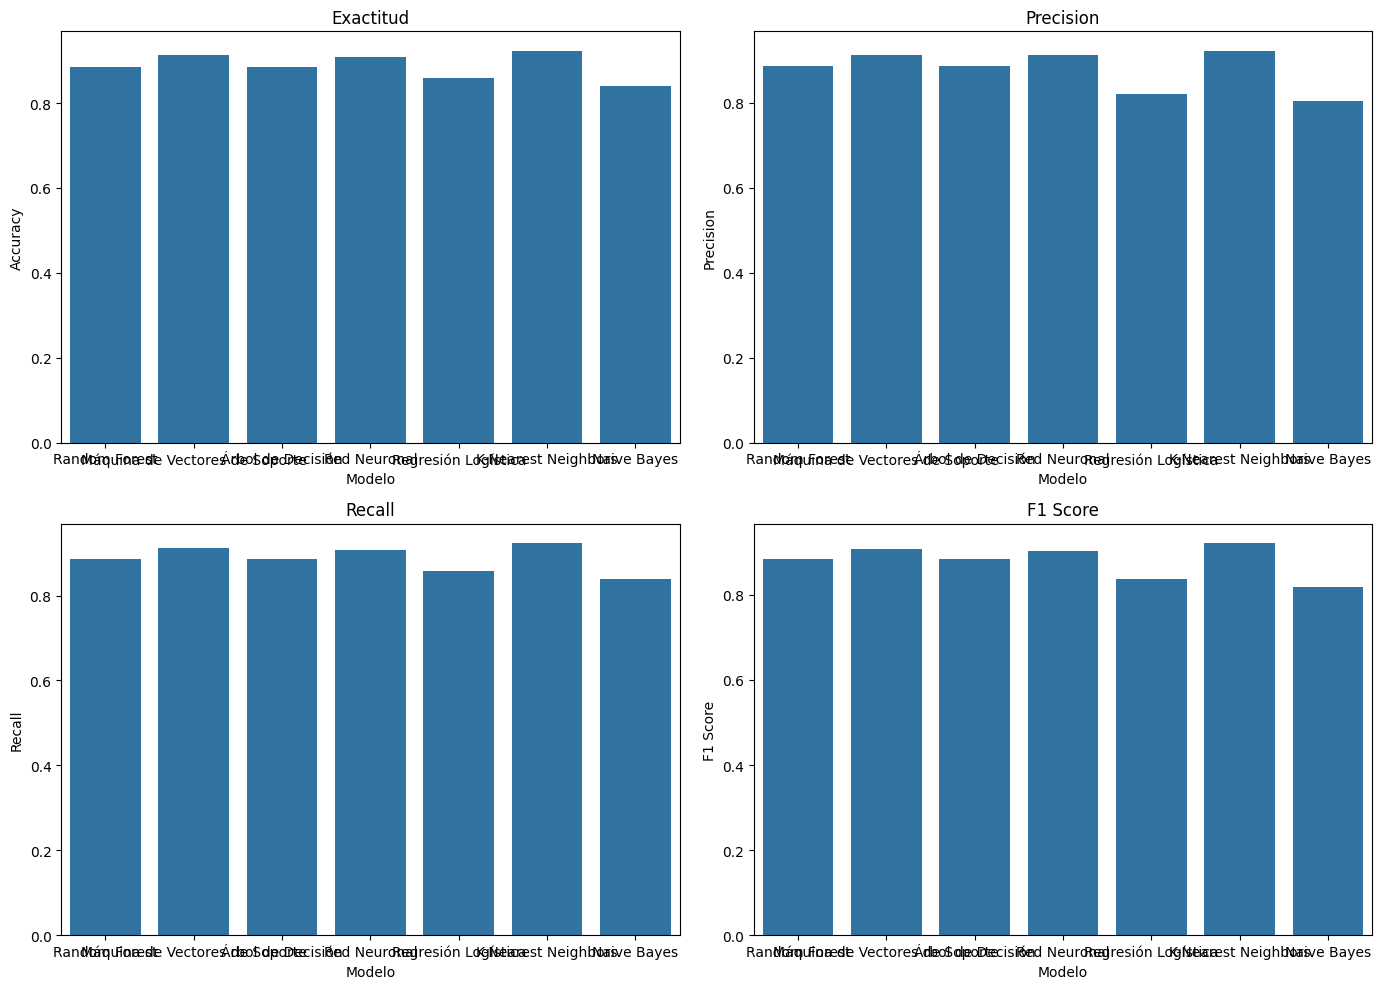

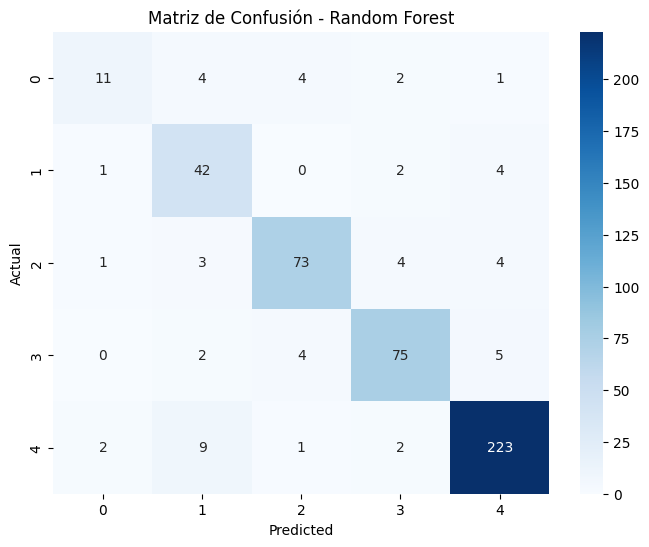

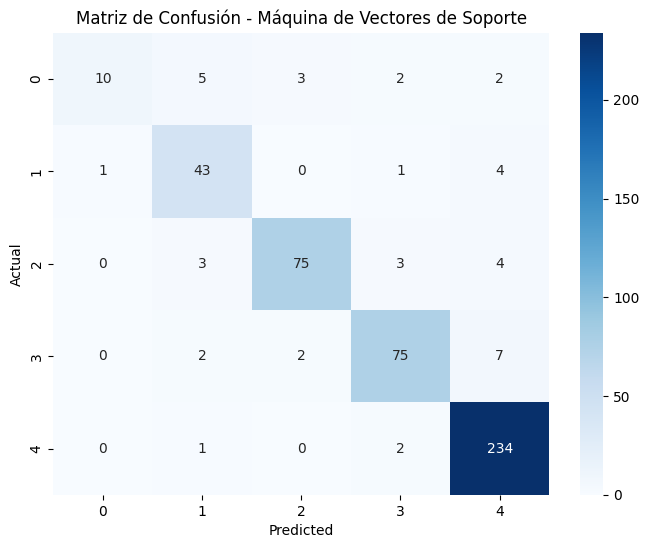

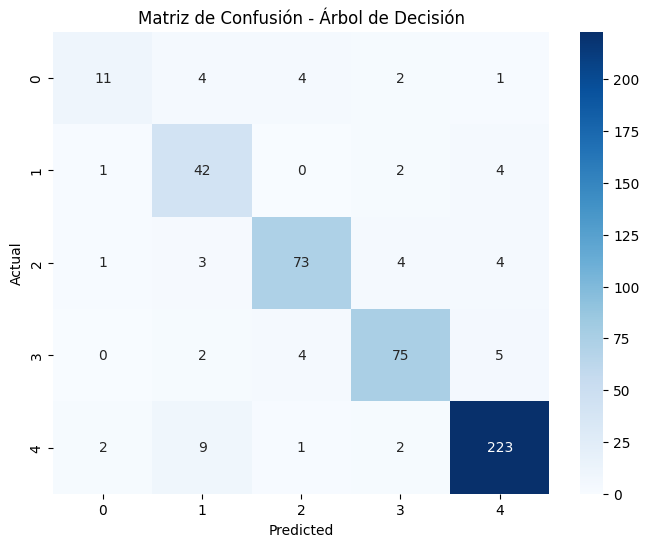

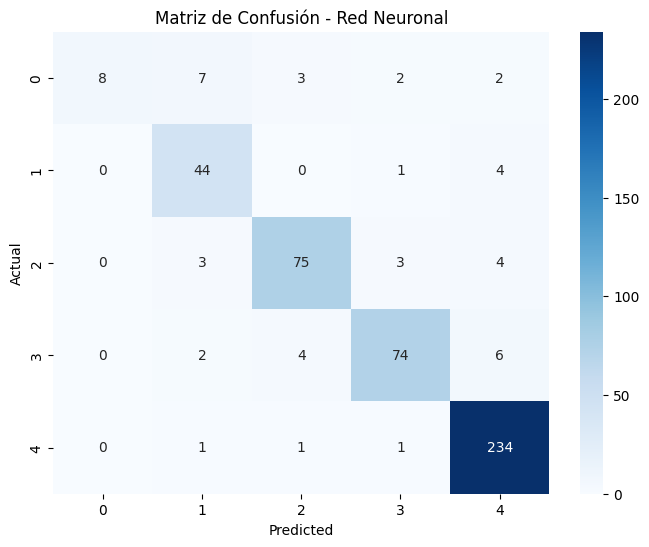

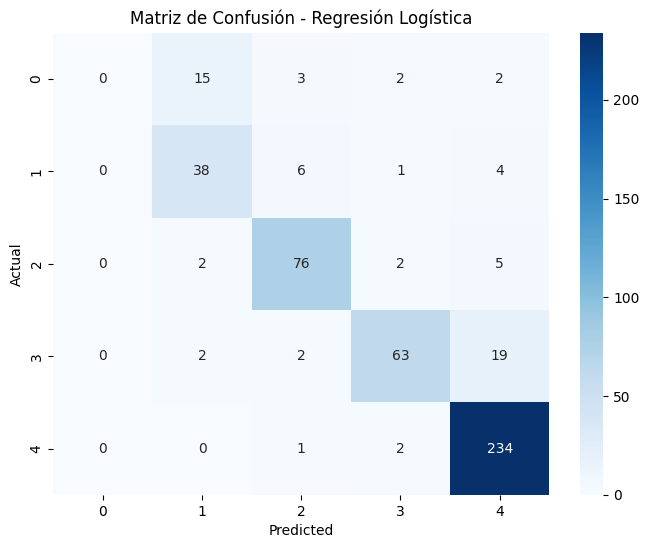

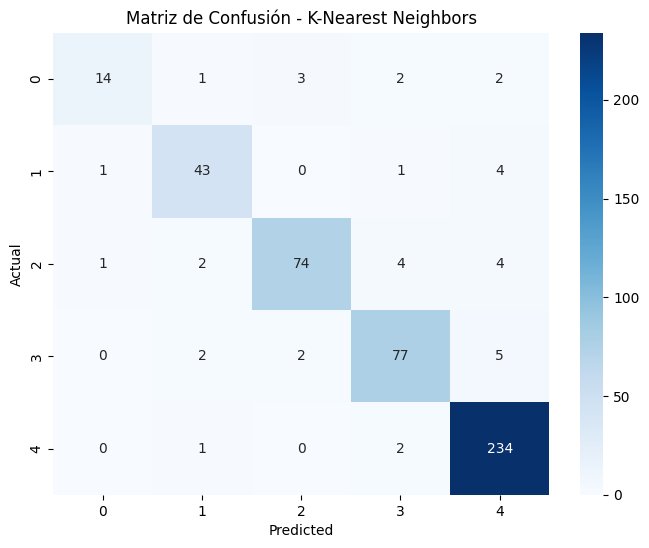

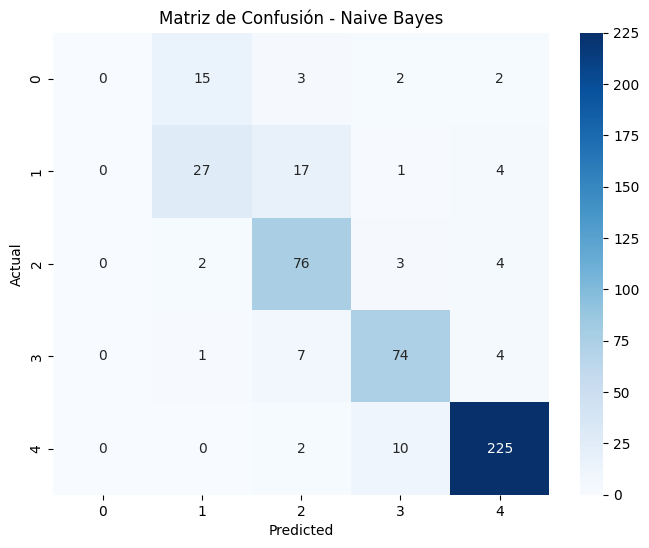

,Modelo,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.885177,0.887237,0.885177,0.884327
1,Máquina de Vectores de Soporte,0.912317,0.913079,0.912317,0.908428
2,Árbol de Decisión,0.885177,0.887237,0.885177,0.884327
3,Red Neuronal,0.908142,0.912383,0.908142,0.902452
4,Regresión Logística,0.858038,0.821595,0.858038,0.836461
5,K-Nearest Neighbors,0.922756,0.921906,0.922756,0.920960
6,Naive Bayes,0.839248,0.803240,0.839248,0.819461


In [110]:
x_n = 'ParentalEducation'
y_n = 'GradeClass'

X = df[[x_n]].values
y = df[y_n].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': random_forest(X_train, X_test, y_train, y_test),
    'Máquina de Vectores de Soporte': maquina_vectores_soporte(X_train, X_test, y_train, y_test),
    'Árbol de Decisión': arbol_decision(X_train, X_test, y_train, y_test),
    'Red Neuronal' : red_neuronal_clasificacion(X_train, X_test, y_train, y_test),
    'Regresión Logística': regresión_logistica(X_train, X_test, y_train, y_test),
    'K-Nearest Neighbors': k_nearest(X_train, X_test, y_train, y_test),
    'Naive Bayes': naive_bayes(X_train, X_test, y_train, y_test)
}

comparison, confusion_matrices = compare_models_class(models)
gen_graph_class(comparison)
gen_confusion_matrix(confusion_matrices)
comparison